In [44]:
import os
print(os.getcwd())

C:\Users\imanp\Documents\DS\GMNcoach-PublicHealth-simData


# Business problem

There are an ongoing concerns about infectious disease outbreaks (e.g., influenza, a specific viral infection, or a non-communicable disease like diabetes within a population). Peak health agencies need to understand patterns, predict future outbreaks, and allocate resources effectively.

Data-driven approaches help understand disease trends and potentially predict future spikes. With big data at public health agencies' disposal, such as:
- Epidemiological data: Number of reported cases, demographics of affected individuals (age, gender, location), symptom onset dates, hospitalization rates, mortality rates.
- Environmental data: Weather patterns (temperature, humidity), air quality.
- Socioeconomic data: Population density, income levels, access to healthcare.
- Behavioral data: Vaccination rates, travel patterns (if applicable to the disease).
- Healthcare system data: Hospital bed occupancy, testing capacity.
- Time-series data: Daily/weekly case counts over time.

Key questions around disease outbreaks, would immensely assist public prevention and response time and action. Questions like, "Which populations are most affected?", "When are outbreaks most likely?", and "What resources are needed?" can be answered in a timely manner providing data-driven insight as well as actional insight.

We will look at a relatively simple, synthetic dataset representing daily/weekly case counts for a fictional disease in a specific region, along with some demographic or environmental factors. This allows us to focus on the analytics without complex data acquisition - which will be the subject of another exercise. For example, there are datasets regarding historical influenza data from a government health department (e.g., Australian Department of Health and Aged Care, WHO, CDC), all of which would require considerable data cleaning.


# Our synthetic dataset

In [45]:
# Code for Data Generation of a simulated public health dataset

import pandas as pd
import numpy as np
from datetime import timedelta, date

In [46]:
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2023, 1, 1)
end_date = date(2024, 6, 1) # Data up to roughly now + a bit for future prediction concept
regions = ['Northwood', 'Southcreek', 'Eastborough', 'Westridge']

data = []
np.random.seed(42) # for reproducibility

for single_date in daterange(start_date, end_date):
    for region in regions:
        # Base cases, add some seasonality and randomness
        base_cases = 5 + np.random.poisson(10) # Base level
        if single_date.month in [1, 2, 11, 12]: # Winter peak (Northern Hemisphere, or could be summer in AU)
            base_cases += np.random.poisson(20)
        elif single_date.month in [6, 7, 8]: # Potential summer peak or dip
            base_cases += np.random.poisson(5) # Smaller summer increase

        # Add some regional variation for outbreaks
        if region == 'Northwood' and single_date.day % 7 == 0: # Small weekly spike
            base_cases += np.random.poisson(15)
        elif region == 'Southcreek' and single_date.day % 14 == 0: # Bi-weekly spike
            base_cases += np.random.poisson(25)
        elif region == 'Eastborough' and single_date.day % 5 == 0:
             base_cases += np.random.poisson(10)

        # Ensure non-negative
        new_cases = max(0, int(base_cases + np.random.normal(0, 5)))

        # Hospitalizations and Deaths derived from cases with some randomness
        hospitalizations = max(0, int(new_cases * (0.05 + np.random.uniform(-0.02, 0.03))))
        deaths = max(0, int(hospitalizations * (0.1 + np.random.uniform(-0.05, 0.05))))

        # Temperature (simulated seasonality, slightly different for regions)
        # temp_base = 15 + 10 * np.sin(single_date.day_of_year * 2 * np.pi / 365)   
        #                                      ^      ^--->'AttributeError: 'datetime.date' object has no attribute 'day_of_year''
        temp_base = 15 + 10 * np.sin(single_date.timetuple().tm_yday * 2 * np.pi / 365)
        if region == 'Northwood': temp_avg = temp_base + np.random.normal(0, 2) + 5
        elif region == 'Southcreek': temp_avg = temp_base + np.random.normal(0, 2) - 5
        else: temp_avg = temp_base + np.random.normal(0, 2)
        temp_avg = max(-5, min(35, temp_avg)) # Cap sensible range

        # Humidity (simulated)
        # humidity_base = 70 + 10 * np.cos(single_date.day_of_year * 2 * np.pi / 365)
        # 
        humidity_base = 70 + 10 * np.cos(single_date.timetuple().tm_yday * 2 * np.pi / 365)
        humidity_avg = humidity_base + np.random.normal(0, 5)
        humidity_avg = max(30, min(95, humidity_avg)) # Cap sensible range

        # Population Density (fixed per region for simplicity, can vary later)
        pop_density = {
            'Northwood': 1500,
            'Southcreek': 800,
            'Eastborough': 2200,
            'Westridge': 1200
        }[region]

        data.append([
            single_date.strftime('%Y-%m-%d'),
            region,
            new_cases,
            hospitalizations,
            deaths,
            round(temp_avg, 2),
            round(humidity_avg, 2),
            pop_density
        ])

df = pd.DataFrame(data, columns=[
    'Date', 'Region', 'New_Cases', 'Hospitalizations', 'Deaths',
    'Temperature_Avg_C', 'Humidity_Avg_Percent', 'Population_Density'
])

# Add some random missing values for realism
for col in ['New_Cases', 'Hospitalizations', 'Temperature_Avg_C']:
    df.loc[df.sample(frac=0.005).index, col] = np.nan
df.loc[df.sample(frac=0.002).index, 'Humidity_Avg_Percent'] = np.nan
df.loc[df.sample(frac=0.001).index, 'Deaths'] = np.nan

df.to_csv('infectious_x_data.csv', index=False)

In [47]:
# Load the CSV file
df = pd.read_csv("infectious_x_data.csv")

# Display first few rows
print(df.head())

         Date       Region  New_Cases  Hospitalizations  Deaths  \
0  2023-01-01    Northwood       39.0               1.0     0.0   
1  2023-01-01   Southcreek       31.0               1.0     0.0   
2  2023-01-01  Eastborough       32.0               1.0     0.0   
3  2023-01-01    Westridge       36.0               1.0     0.0   
4  2023-01-02    Northwood       37.0               1.0     0.0   

   Temperature_Avg_C  Humidity_Avg_Percent  Population_Density  
0              21.71                 77.65                1500  
1               8.15                 81.57                 800  
2              12.32                 74.24                2200  
3              16.82                 73.89                1200  
4              20.69                 79.42                1500  


In [48]:
display(df)

,Date,Region,New_Cases,Hospitalizations,Deaths,Temperature_Avg_C,Humidity_Avg_Percent,Population_Density
0,2023-01-01,Northwood,39.0,1.0,0.0,21.71,77.65,1500
1,2023-01-01,Southcreek,31.0,1.0,0.0,8.15,81.57,800
2,2023-01-01,Eastborough,32.0,1.0,0.0,12.32,74.24,2200
3,2023-01-01,Westridge,36.0,1.0,0.0,16.82,73.89,1200
4,2023-01-02,Northwood,37.0,1.0,0.0,20.69,79.42,1500
...,...,...,...,...,...,...,...,...
2063,2024-05-30,Westridge,24.0,1.0,0.0,22.01,57.11,1200
2064,2024-05-31,Northwood,10.0,0.0,0.0,26.88,68.49,1500
2065,2024-05-31,Southcreek,24.0,1.0,0.0,15.39,70.52,800
2066,2024-05-31,Eastborough,18.0,1.0,0.0,21.22,69.56,2200


In [49]:
# Display the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2068 non-null   object 
 1   Region                2068 non-null   object 
 2   New_Cases             2058 non-null   float64
 3   Hospitalizations      2058 non-null   float64
 4   Deaths                2066 non-null   float64
 5   Temperature_Avg_C     2058 non-null   float64
 6   Humidity_Avg_Percent  2064 non-null   float64
 7   Population_Density    2068 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 129.4+ KB


In [50]:
# Get a quick statistical summary of the numerical columns 
df.describe()

,New_Cases,Hospitalizations,Deaths,Temperature_Avg_C,Humidity_Avg_Percent,Population_Density
count,2058.000000,2058.000000,2066.0,2058.000000,2064.000000,2068.00000
mean,23.658892,0.795918,0.0,17.155447,70.747141,1425.00000
std,12.336801,0.837353,0.0,8.029756,8.484762,511.86101
min,0.000000,0.000000,0.0,-3.040000,45.520000,800.00000
25%,14.000000,0.000000,0.0,10.940000,64.480000,1100.00000
50%,21.000000,1.000000,0.0,18.205000,70.910000,1350.00000
75%,33.000000,1.000000,0.0,23.270000,77.472500,1675.00000
max,80.000000,6.000000,0.0,33.970000,95.000000,2200.00000


In [51]:
# Check for missing values in each column
df.isnull().sum()

Date                     0
Region                   0
New_Cases               10
Hospitalizations        10
Deaths                   2
Temperature_Avg_C       10
Humidity_Avg_Percent     4
Population_Density       0
dtype: int64

In [52]:
# Need 'Date' to be a datetime object for time-series analysis -currently it is object.
df["Date"] = pd.to_datetime(df["Date"])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2068 non-null   datetime64[ns]
 1   Region                2068 non-null   object        
 2   New_Cases             2058 non-null   float64       
 3   Hospitalizations      2058 non-null   float64       
 4   Deaths                2066 non-null   float64       
 5   Temperature_Avg_C     2058 non-null   float64       
 6   Humidity_Avg_Percent  2064 non-null   float64       
 7   Population_Density    2068 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 129.4+ KB


# Dealing with the missing values

Dropping rows might be appropriate if: 
- More than 30% of values are missing for a given row.
- The missing values appear randomly across different columns, not systematically.
- The dataset is large enough that dropping a small fraction doesn’t affect overall analysis.

In this case, missing values are relatively few and appear within columns that exhibit seasonal or time-based patterns, making interpolation or imputation a better choice than outright deletion. Removing data can lead to unintended consequences, especially in time-series and public health datasets, for the following reasons:

1. Preserving Temporal Continuity
Your dataset contains time-dependent variables (cases, hospitalizations, deaths). Removing rows outright might create gaps in the timeline, disrupting trends and making forecasting models less reliable.

2. Keeping Statistical Integrity
Every row in your dataset represents meaningful real-world data. If a row is removed, you lose information, which could skew results in analyses like trend detection or seasonal modeling. Instead, imputing missing values ensures that we retain the full structure of the dataset.

3. Strategic Handling Based on Column Importance
For Deaths (only 2 missing values) → Dropping those rows might not significantly impact analysis, but filling in reasonable estimates keeps mortality trends consistent.

For New_Cases, Hospitalizations, Temperature_Avg_C, and Humidity_Avg_Percent → These are high-frequency variables where missing values can be inferred from surrounding data. Interpolation or mean substitution helps retain meaningful trends without loss.



## 1. New_Cases (10 missing records)
Strategy: Imputation using time-series trends

What does interpolation do?
Interpolation fills missing values by estimating them based on surrounding data points. The simplest method used is linear interpolation, which assumes a steady progression between known values. So if on Days 1, 2, and 3, records show 100, NaN, and 120 new cases, the 'interpolate' linear method will impute and replace NaN with a reasonable midpoint, ie. '110'.

In [54]:
df["New_Cases"] = df["New_Cases"].interpolate(method="linear")

## 2. Hospitalizations (10 missing records)
Strategy: Imputation based on cases

The strategy of imputing hospitalizations using a fixed hospitalization rate is based on a logical assumption: the number of hospitalizations is typically proportional to the number of new cases in a population. This means that, even if some hospitalization data is missing, we can estimate it based on known infection rates.

Since Hospitalizations are derived from New_Cases, we estimate them using the fixed hospitalization rate average of 0.05%, that was 'declared' when creating our simulated public health dataset. NB Cell [22] lines 32 to 34: ...

     hospitalizations = max(0, int(new_cases * (0.05 + np.random.uniform(-0.02, 0.03))))

In [55]:
df["Hospitalizations"].fillna(df["New_Cases"] * 0.05, inplace=True)  
#                                                ^ Assuming 5% hospitalization rate

## 3. Deaths (2 missing records)
Strategy: Imputation using hospitalizations

Since Deaths generally follow hospitalizations, we will estimate missing values using a death rate - which is the death rate figure we used to generate the simulated dataset. NB Cell [22] lines 32 to 34: ...

    deaths = max(0, int(hospitalizations * (0.1 + np.random.uniform(-0.05, 0.05))))
    
 At is worth mentioning that given the low number of missing records, dropping those rows is also an option if they don't significantly affect analysis.

In [56]:
df["Deaths"].fillna(df["Hospitalizations"] * 0.1, inplace=True)  
#                                             ^ Assuming 10% mortality rate

## 4. Temperature_Avg_C (10 missing records)
Strategy: Seasonal interpolation

Since Temperature follows a sinusoidal pattern, so interpolate based on neighboring values. A sinusoidal pattern refers to a wave-like fluctuation that follows the shape of a sine or cosine function. In the context of temperature, this pattern models seasonal variations, where temperatures follow a predictable cycle over time. Why Use a Sinusoidal Pattern for Temperature?
- **Natural Cyclic Behavior**: Temperature changes throughout the year typically follow a smooth, periodic pattern due to the Earth's axial tilt and orbit around the Sun.
- **Captures Seasonality**: Warmer months see rising temperatures, while colder months experience cooling—creating a wave-like curve.
- **Mathematical Representation**: A sine function effectively maps this behavior using trigonometry.

In [57]:
df["Temperature_Avg_C"] = df["Temperature_Avg_C"].interpolate(method="linear")

## 5. Humidity_Avg_Percent (4 missing records)
Strategy: Mean substitution

Humidity is highly dependent on seasonality, so filling with the monthly mean is effective

In [58]:
df["Humidity_Avg_Percent"].fillna(df.groupby(df["Date"].dt.month)["Humidity_Avg_Percent"].transform("mean"), inplace=True)


- ***df.groupby(df["Date"].dt.month)***

Groups the dataset by month (extracting the month from the Date column). This ensures each month is treated separately when computing missing values.
    
    
- ***["Humidity_Avg_Percent"].transform("mean")***

Within each month, it calculates the mean humidity value. transform("mean") applies the average value back to the original DataFrame without collapsing it.
    
    
- ***.fillna(...)***

Any NaN values in the Humidity_Avg_Percent column are replaced with the mean humidity for the corresponding month.
    
    
- ***inplace=True***

Directly applies changes to the DataFrame without requiring reassignment.

## Reviewing the NaNs in the dataset

In [59]:
# Check for missing values in each column
df.isnull().sum()

Date                    0
Region                  0
New_Cases               0
Hospitalizations        0
Deaths                  0
Temperature_Avg_C       0
Humidity_Avg_Percent    0
Population_Density      0
dtype: int64

# Explaratory data analysis

## Time-series trends

Identifying any apparent seasonality (e.g., higher cases in certain months/seasons) or long-term trends.


### New Cases over Time:




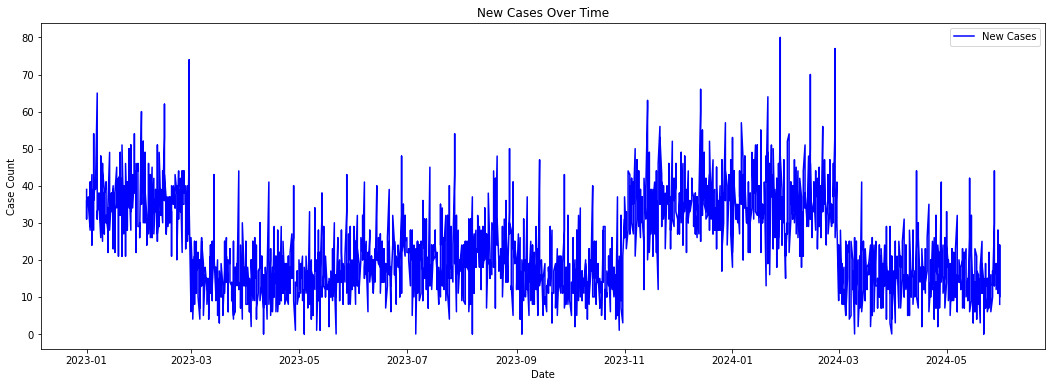

In [72]:
import matplotlib.pyplot as plt

# Plotting new cases over time

plt.figure(figsize=(18,6))
plt.plot(df["Date"], df["New_Cases"], label="New Cases", color="blue")
plt.xlabel("Date")
plt.ylabel("Case Count")
plt.title("New Cases Over Time")
plt.legend()
plt.show()

### New Cases, Hospitalizations, and Deaths over Time.

This will allow direct comparison of cases, hospitalizations, and deaths over time on the one graph.

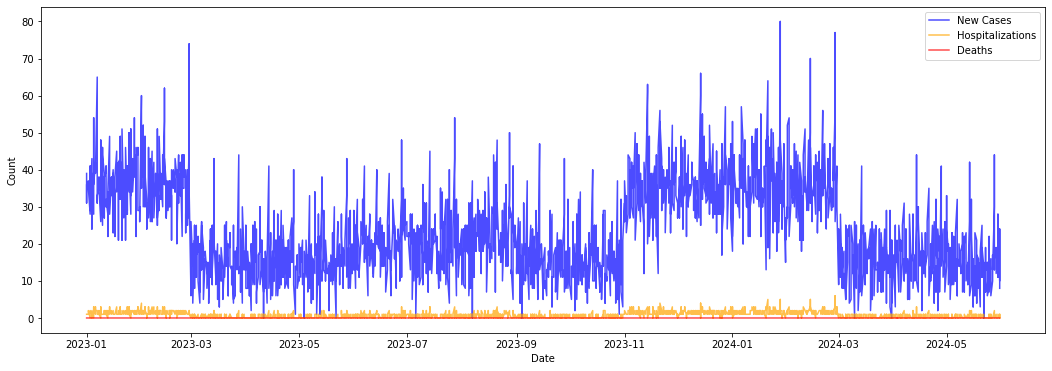

In [73]:
plt.figure(figsize=(18,6))

# plotting New Cases
plt.plot(df["Date"], df["New_Cases"], label="New Cases", color="blue", alpha=0.7)

# plotting Hospitalizations
plt.plot(df["Date"], df["Hospitalizations"], label="Hospitalizations", color="orange", alpha=0.7)

# plotting Deaths
plt.plot(df["Date"], df["Deaths"], label="Deaths", color="red", alpha=0.7)

plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

### Separate Subplots of New Cases, Hospitalizations, and Deaths over Time.

For individual visibility for each trend separate subplots are presented, but with Time variable in alignment.

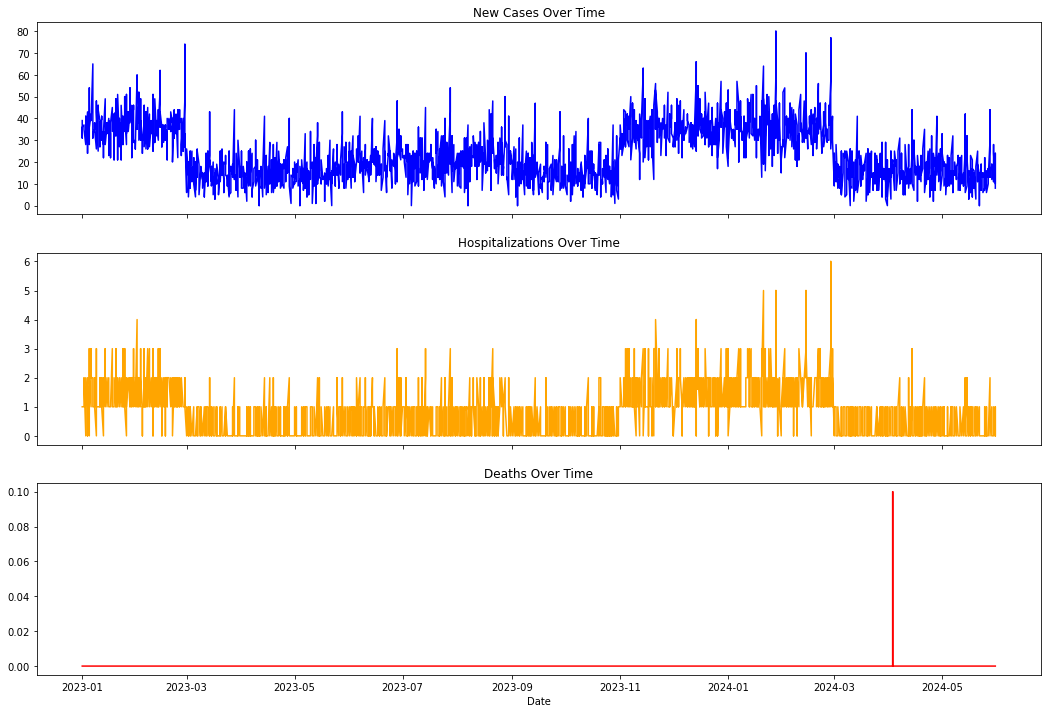

In [74]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 12), sharex=True)

# New Cases
axes[0].plot(df["Date"], df["New_Cases"], color="blue")
axes[0].set_title("New Cases Over Time")

# Hospitalizations
axes[1].plot(df["Date"], df["Hospitalizations"], color="orange")
axes[1].set_title("Hospitalizations Over Time")

# Deaths
axes[2].plot(df["Date"], df["Deaths"], color="red")
axes[2].set_title("Deaths Over Time")

plt.xlabel("Date")
plt.show()

### Separate Subplots of New Cases, Hospitalizations, and Deaths over Time, with TRENDLINE

- The trendlines in each subplot will help visualize overall movement and patterns in the time-series data. We will use a  rolling average of 28-days (4 weeks). A rolling mean helps smooth fluctuations and highlights underlying patterns.

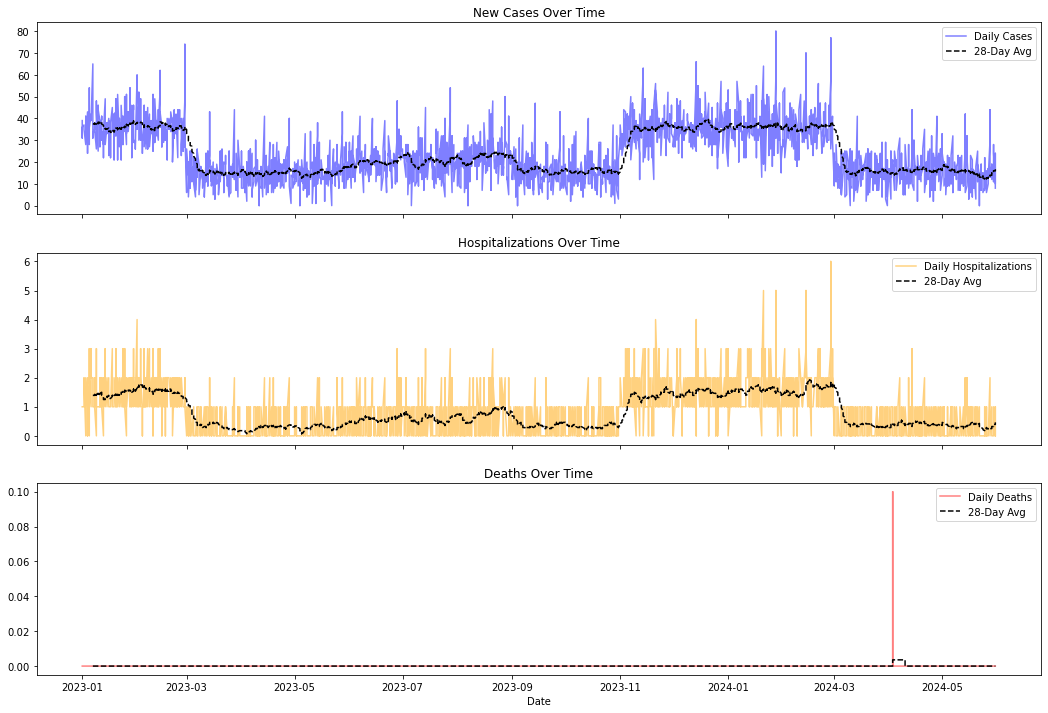

In [75]:
# Compute rolling averages (7-day moving average)
df["New_Cases_MA28"] = df["New_Cases"].rolling(window=28).mean()
df["Hospitalizations_MA28"] = df["Hospitalizations"].rolling(window=28).mean()
df["Deaths_MA28"] = df["Deaths"].rolling(window=28).mean()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 12), sharex=True)

# New Cases with Trendline
axes[0].plot(df["Date"], df["New_Cases"], color="blue", alpha=0.5, label="Daily Cases")
axes[0].plot(df["Date"], df["New_Cases_MA28"], color="black", linestyle="dashed", label="28-Day Avg")
axes[0].set_title("New Cases Over Time")
axes[0].legend()

# Hospitalizations with Trendline
axes[1].plot(df["Date"], df["Hospitalizations"], color="orange", alpha=0.5, label="Daily Hospitalizations")
axes[1].plot(df["Date"], df["Hospitalizations_MA28"], color="black", linestyle="dashed", label="28-Day Avg")
axes[1].set_title("Hospitalizations Over Time")
axes[1].legend()

# Deaths with Trendline
axes[2].plot(df["Date"], df["Deaths"], color="red", alpha=0.5, label="Daily Deaths")
axes[2].plot(df["Date"], df["Deaths_MA28"], color="black", linestyle="dashed", label="28-Day Avg")
axes[2].set_title("Deaths Over Time")
axes[2].legend()

plt.xlabel("Date")
plt.show()


- If the data exhibits non-linear patterns, polynomial regression is a useful tool, which we will try here.

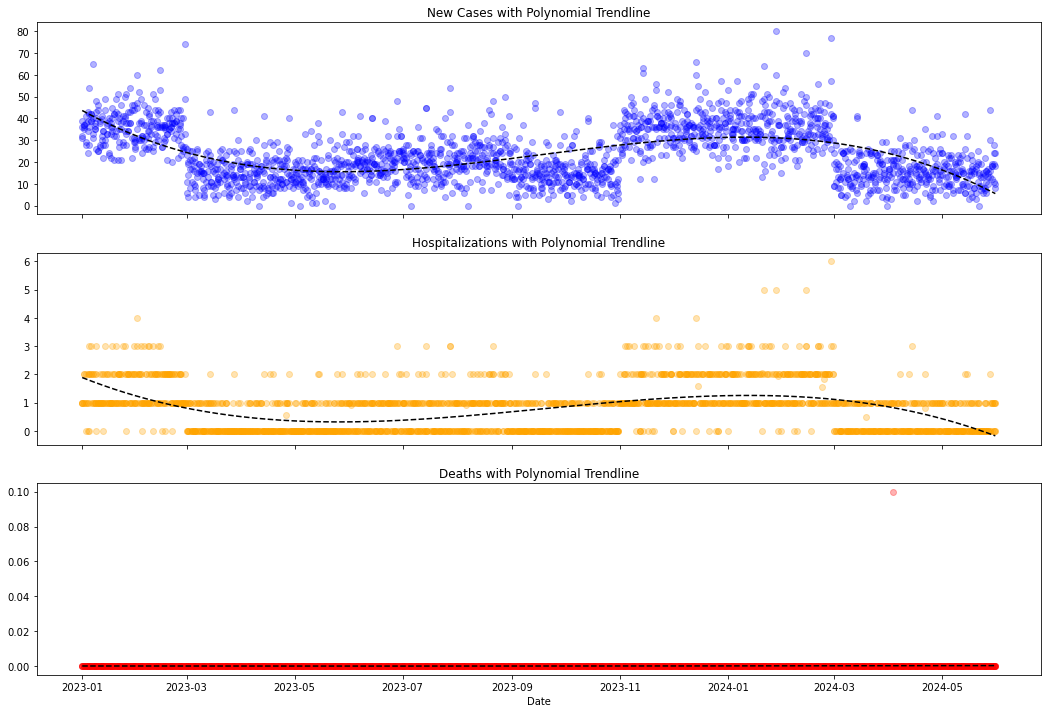

In [77]:
import seaborn as sns

# Convert dates to numerical values for trend modeling
df["Days"] = (df["Date"] - df["Date"].min()).dt.days

# Function to fit polynomial trendline
def poly_trend(x, y, degree=3):
    coeffs = np.polyfit(x, y, degree)
    return np.polyval(coeffs, x)

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 12), sharex=True)

# New Cases Polynomial Trendline
axes[0].scatter(df["Date"], df["New_Cases"], color="blue", alpha=0.3)
axes[0].plot(df["Date"], poly_trend(df["Days"], df["New_Cases"]), color="black", linestyle="dashed")
axes[0].set_title("New Cases with Polynomial Trendline")

# Hospitalizations Polynomial Trendline
axes[1].scatter(df["Date"], df["Hospitalizations"], color="orange", alpha=0.3)
axes[1].plot(df["Date"], poly_trend(df["Days"], df["Hospitalizations"]), color="black", linestyle="dashed")
axes[1].set_title("Hospitalizations with Polynomial Trendline")

# Deaths Polynomial Trendline
axes[2].scatter(df["Date"], df["Deaths"], color="red", alpha=0.3)
axes[2].plot(df["Date"], poly_trend(df["Days"], df["Deaths"]), color="black", linestyle="dashed")
axes[2].set_title("Deaths with Polynomial Trendline")

plt.xlabel("Date")
plt.show()


Wanting to discern if there s a lag of Hospitalizations to New Cases, as is somewhat discernible in inspecting the plot as well as is logical in real world settings.

The technique for observing delays in trends, is by checking for correlations, in this case between hospitalisations and new cases.

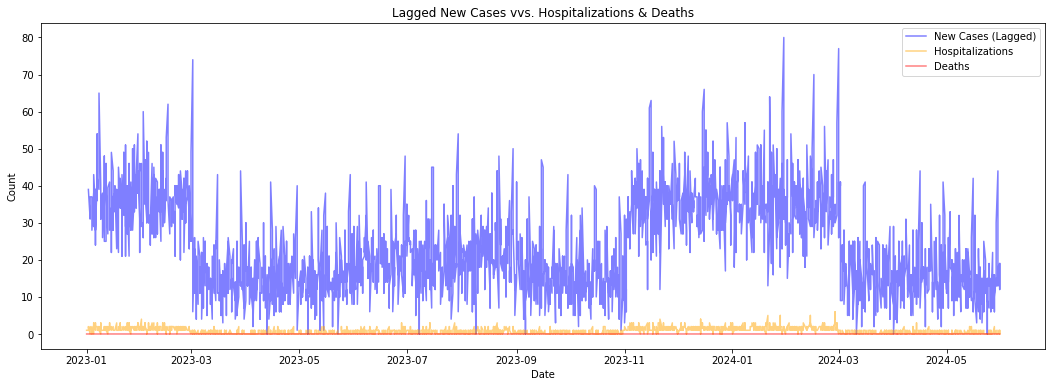

In [147]:
df["New_Cases_Lagged"] = df["New_Cases"].shift(7)
#                                        ^ Shift by 7 days (or adjust as needed)

plt.figure(figsize=(18, 6))
plt.plot(df["Date"], df["New_Cases_Lagged"], label="New Cases (Lagged)", color="blue", alpha=0.5)
plt.plot(df["Date"], df["Hospitalizations"], label="Hospitalizations", color="orange", alpha=0.5)
plt.plot(df["Date"], df["Deaths"], label="Deaths", color="red", alpha=0.5)

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Lagged New Cases vvs. Hospitalizations & Deaths")
plt.legend()
plt.show()

## KEY OBSERVATIONS

The visualizations help uncover long-term trends in New Cases, Hospitalizations, and Deaths over time. Further, by using rolling averages and polynomial regression to smooth fluctuations, we are able to plot an overall 'trendline' to obviate better the pattern. Thus, regarding:

- **New Cases** (Blue Dots & Black Trendline)
    - The blue scatter points represent recorded daily new cases.
    - The black polynomial trendline smooths out the noise, revealing overall movement.
    - The trend appears fluctuating, with peaks and troughs indicating potential waves of infection.

    If the trendline shows steady growth, it suggests a prolonged outbreak. If it declines, new cases may be stabilizing. If it has cyclical behavior, this hints at seasonality—perhaps linked to environmental or behavioral factors.
    
    
 - **Hospitalizations** (Orange Dots & Black Trendline)
    - The trendline generally follows the case count but at a lower scale (hospitalization rates).
    - The periods of stability and increase reflect how hospitalizations lag behind new cases.
    
    If the trendline increases after cases rise, this validates the expectation that hospitalizations trail infection waves. A stable hospitalization trend (despite fluctuating cases) might indicate improved healthcare response.
    
- **Deaths** (Red Dots & Black Trendline)
    - The number of deaths remains low and stable, but the trendline suggests a slight increase at the end.
    - The polynomial curve may capture long-term shifts in mortality risk.

    If deaths gradually rise, we might need to investigate whether hospital capacity, medical interventions, or viral severity changed over time. The stability in deaths suggests that while infection waves occur, fatality rates remain controlled—which could indicate successful intervention measures.




## Exploring patterns within smaller time frames: do cases fluctuate intra-weekly and/or intra-monthly?

### Analyzing Weekly Seasonality (Monday to Sunday)

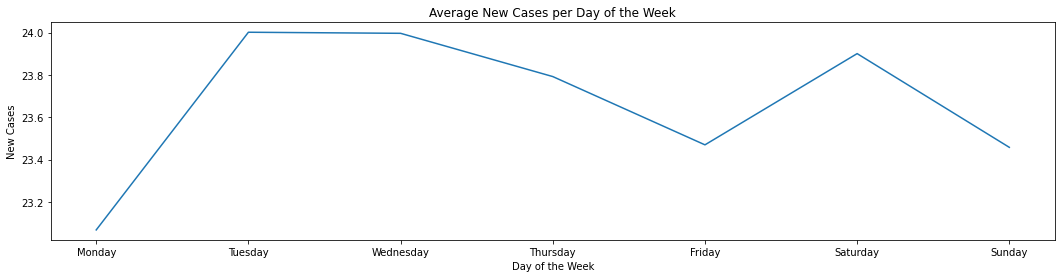

In [162]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Extract weekday names
df["Day_of_Week"] = df["Date"].dt.day_name()  

# Define the correct order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Day_of_Week"] = pd.Categorical(df["Day_of_Week"], categories=day_order, ordered=True)

df_grouped = df.groupby("Day_of_Week")["New_Cases"].mean()
#    Groups the dataset by Day_of_Week; and, Calculates the average number of new cases for each day.

plt.figure(figsize=(18, 4))
sns.lineplot(x=df_grouped.index, y=df_grouped.values)
#            ^ Places day names on the X-axis
#                                ^ Plots corresponding average case counts on the Y-axis.
plt.title("Average New Cases per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("New Cases")
plt.show()

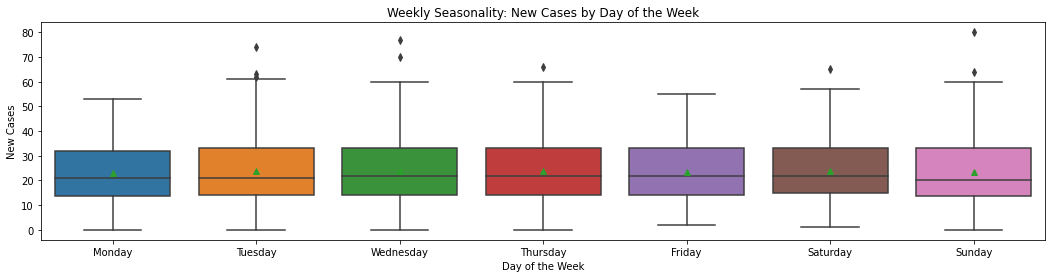

In [174]:
# import seaborn as sns
# import matplotlib.pyplot as plt

df["Day_of_Week"] = df["Date"].dt.day_name()  # Extract weekday names

plt.figure(figsize=(18, 4))
sns.boxplot(x="Day_of_Week", y="New_Cases", data=df, showmeans=True, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Weekly Seasonality: New Cases by Day of the Week")
plt.xlabel("Day of the Week")              # plt.xlabel("Day of the Week")
plt.ylabel("New Cases")        # plt.ylabel("New Cases")
plt.show()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

df["Day_of_Week"] = df["Date"].dt.day_name()  # Extract weekday names

plt.figure(figsize=(18, 4))
sns.boxplot(x="Day_of_Week", y="New_Cases", data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Weekly Seasonality: New Cases by Day of the Week")
plt.xlabel("Day of the Week")              # plt.xlabel("Day of the Week")
plt.ylabel("New Cases")        # plt.ylabel("New Cases")
plt.show()

### Analyzing Monthly Seasonality (January to December)

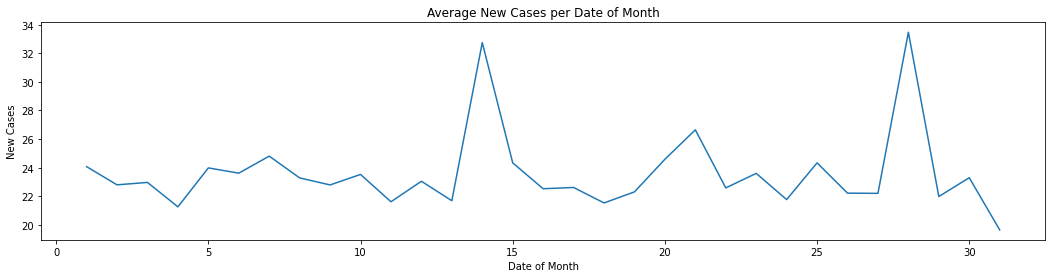

In [170]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Extract date of month
df["Date_of_Month"] = df["Date"].dt.day  


df_grouped = df.groupby("Date_of_Month")["New_Cases"].mean()
#    Groups the dataset by Date_of_Month; and, Calculates the average number of new cases for each date of the month.

plt.figure(figsize=(18, 4))
sns.lineplot(x=df_grouped.index, y=df_grouped.values)
#            ^ Places dates of month on the X-axis
#                                ^ Plots corresponding average case counts on the Y-axis.
plt.title("Average New Cases per Date of Month")
plt.xlabel("Date of Month")
plt.ylabel("New Cases")
plt.show()

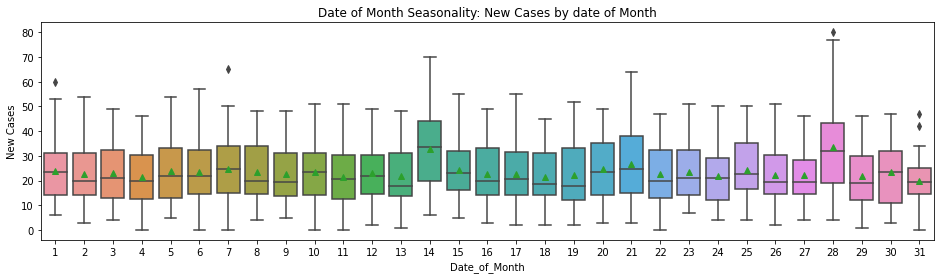

In [175]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Extract date of month
# df["Date_of_Month"] = df["Date"].dt.day  

plt.figure(figsize=(16, 4))
sns.boxplot(x="Date_of_Month", y="New_Cases", data=df, showmeans=True)
plt.title("Date of Month Seasonality: New Cases by date of Month")
plt.xlabel("Date_of_Month")            
plt.ylabel("New Cases")      
plt.show()

## KEY OBSERVATIONS

After surmising the entire time span in the previous section, this section sought to explore intra-week and intra-month patterns to see if cases fluctuate within smaller time frames.

New case peaks are quite evident in the early weekdays (viz. Tuesday and Wednesday) and the Saturday of the weekend. Behavioural explanations may link these peaks to increased people contact due to the start of the working week (following a weekend holiday, prior); while the Saturday peak may be linked to increased socialising over Friday/Saturday recreational activities (and then 'rest at home' on Sunday?).

Interestingly, too, intra-month inspection of the line- and box- plots, show mid-month and end-of-month peaks.

More historical data, as well as contextual information of behavioural and environmentaql factors  are required to understand better these intra- weekly and monthly cycles.


## Heatmap for Combined Weekly & Monthly Seasonality

This heatmap can help visualize both intra-week and intra-month trends together.

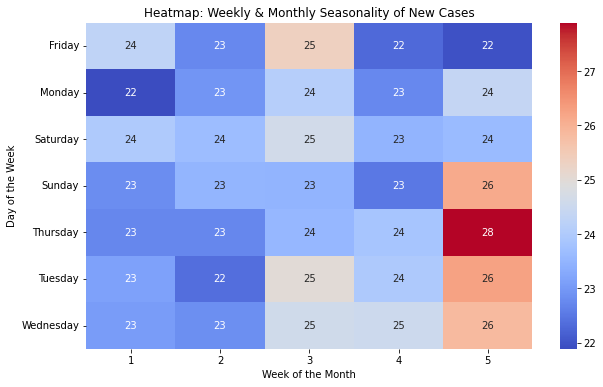

In [180]:

df["Week_of_Month"] = df["Date"].dt.day // 7 + 1  # Assign week number within the month

pivot_table = df.pivot_table(values="New_Cases", index="Day_of_Week", columns="Week_of_Month", aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True)
plt.title("Heatmap: Weekly & Monthly Seasonality of New Cases")
plt.xlabel("Week of the Month")
plt.ylabel("Day of the Week")
plt.show()


## Regional Differences

Seeking differences or similarities observed between regions regarding outbreak patterns, severity (hospitalizations/deaths), and trends.

For a fairer comparison across regions we will ***normalize*** New_Cases by Population_Density. Raw case counts can be misleading because regions with larger populations tend to have higher absolute numbers. Normalizing allows you to assess relative infection rates rather than just total cases.

### Multi-Line Time-Series Plot

In [79]:
# Standardizing the case counts

df["Cases_per_1000"] = (df["New_Cases"]) / df["Population_Density"] * 1000

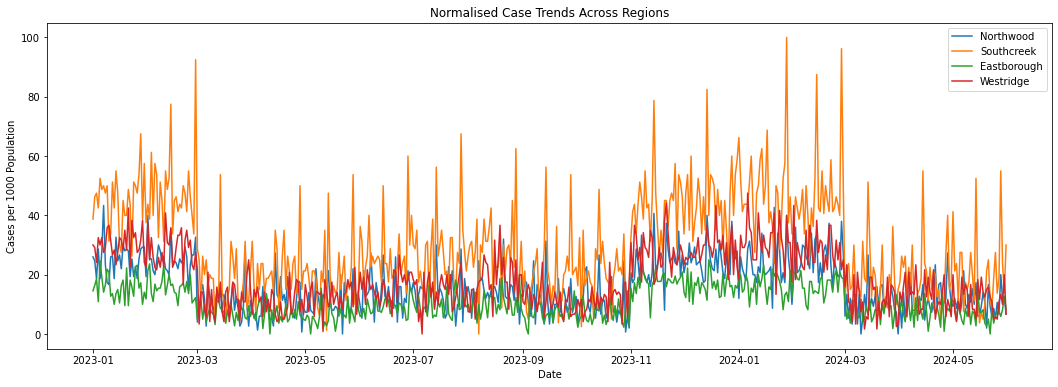

In [80]:
plt.figure(figsize=(18, 6))

# Iterate through each region and plot the normalized case trend
regions = df["Region"].unique()
#                       ^ This retrieves a list of distinct region names present in the dataset.
#                         Each unique entry represents a separate geographic area for comparison.
for region in regions:
#                         A for loop cycles through each region extracted earlier.
#                         It ensures that we process each region separately when plotting.
    subset = df[df["Region"] == region]
#                This creates a subset of the dataset, containing only rows belonging to the given region.
#                It helps isolate each region’s trends without interference from other locations.

    plt.plot(subset["Date"], subset["Cases_per_1000"], label=region)
    
plt.xlabel("Date")
plt.ylabel("Cases per 1000 Population")
plt.title("Normalised Case Trends Across Regions")
plt.legend()
plt.show()

A busy time-series plot can make it challenging to discern meaningful trends. To smooth the graphing and highlight patterns over time, we'll consider applying a ***Rolling Mean (Moving Average)*** of, say, 28 days (i.e. 4 weeks or a month).

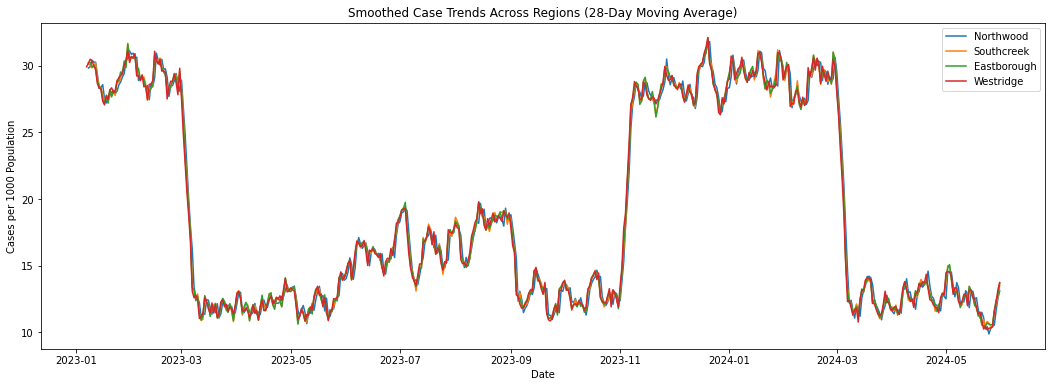

In [82]:
#
df["Cases_per_1000_MA28"] = df["Cases_per_1000"].rolling(window=28).mean()

plt.figure(figsize=(18, 6))

for region in df["Region"].unique():
    subset = df[df["Region"] == region]
    plt.plot(subset["Date"], subset["Cases_per_1000_MA28"], label=region)

plt.xlabel("Date")
plt.ylabel("Cases per 1000 Population")
plt.title("Smoothed Case Trends Across Regions (28-Day Moving Average)")
plt.legend()
plt.show()

Instead of a Rolling Mean, lets use another techniques called ***LOESS (Locally Weighted Regression)***. This is useful for If trends exhibit non-linearity, such that LOESS smooths without assuming a strict function. I*t works well for seasonal trends and irregular variations.

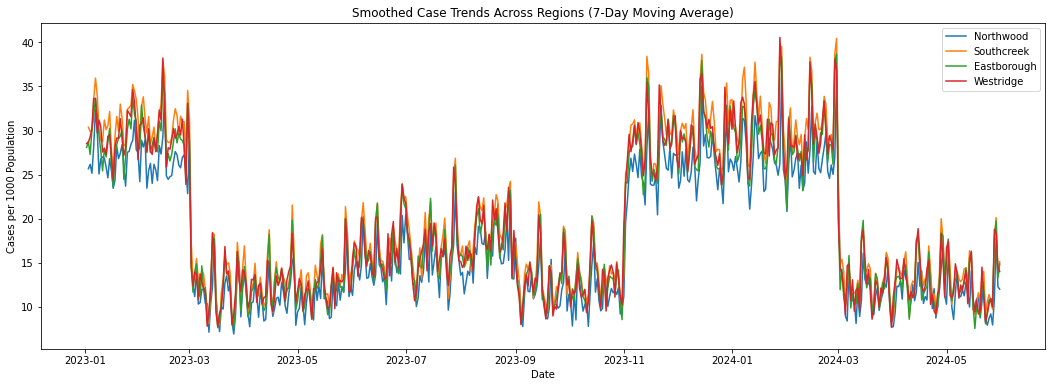

In [84]:
import statsmodels.api as sm

df["Cases_per_1000_LOESS"] = sm.nonparametric.lowess(df["Cases_per_1000"], df["Date"], frac=0.1)[:, 1]

plt.figure(figsize=(18, 6))

for region in df["Region"].unique():
    subset = df[df["Region"] == region]
    plt.plot(subset["Date"], subset["Cases_per_1000_MA7"], label=region)

plt.xlabel("Date")
plt.ylabel("Cases per 1000 Population")
plt.title("Smoothed Case Trends Across Regions (7-Day Moving Average)")
plt.legend()
plt.show()


Alternately, using ***Exponential Moving Average (EMA)*** gives more weight to recent values while smoothing, and thereby highlights short-term changes while maintaining smooth trends.

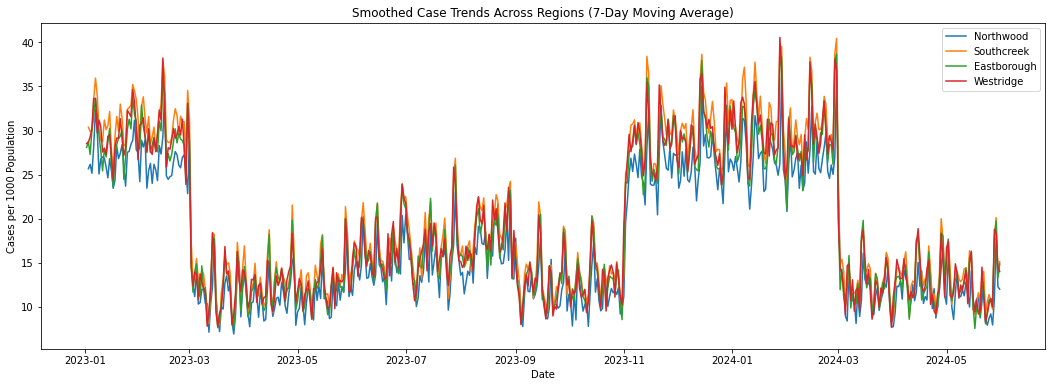

In [85]:
df["Cases_per_1000_EMA"] = df["Cases_per_1000"].ewm(span=7, adjust=False).mean()

plt.figure(figsize=(18, 6))

for region in df["Region"].unique():
    subset = df[df["Region"] == region]
    plt.plot(subset["Date"], subset["Cases_per_1000_MA7"], label=region)

plt.xlabel("Date")
plt.ylabel("Cases per 1000 Population")
plt.title("Smoothed Case Trends Across Regions (7-Day Moving Average)")
plt.legend()
plt.show()

### Faceted Subplots for Each Region

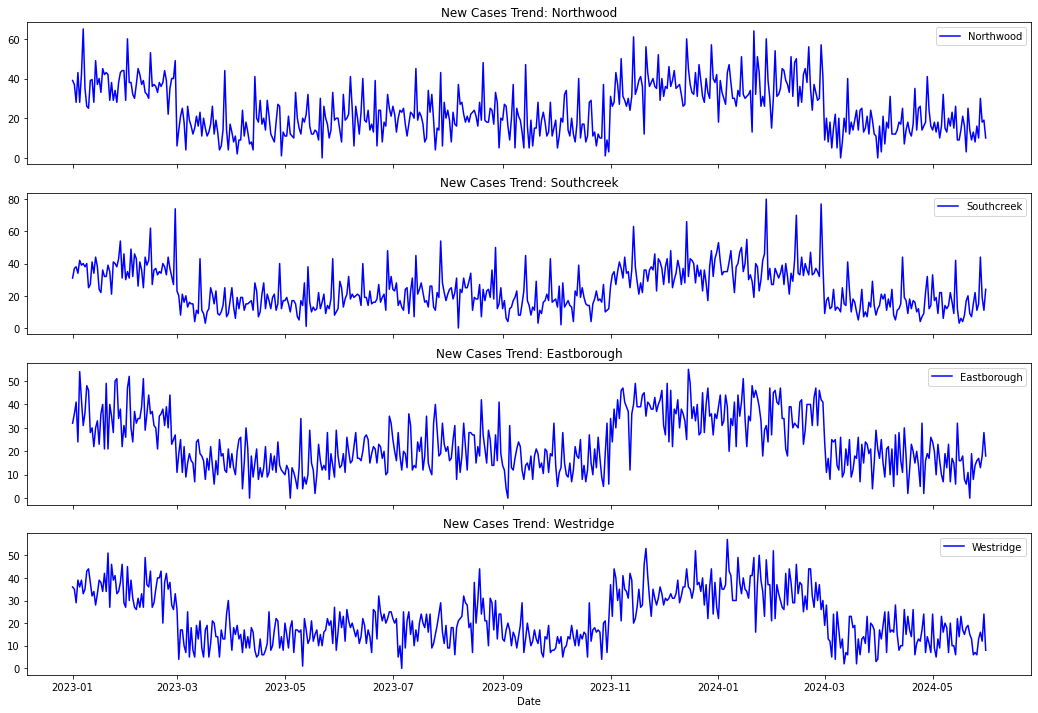

In [86]:
regions = df["Region"].unique()
fig, axes = plt.subplots(nrows=len(regions), ncols=1, figsize=(18, len(regions) *3), sharex=True)

# Creating one subplot per region
for i, region in enumerate(regions):
    subset = df[df["Region"] == region]
    axes[i].plot(subset["Date"], subset["New_Cases"], label=region, color="blue")
    axes[i].set_title(f"New Cases Trend: {region}")
    axes[i].legend()
    
plt.xlabel("Date")
plt.show()

### Boxplot to Compare Distributions

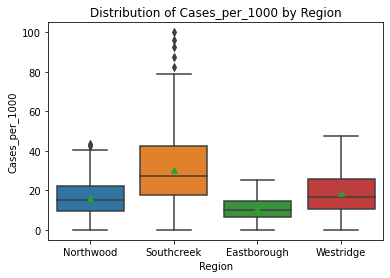

In [176]:
import seaborn as sns

sns.boxplot(x="Region", y="Cases_per_1000", data=df, showmeans=True)
plt.title("Distribution of Cases_per_1000 by Region")
plt.show()

Let's make this a stacked horizontal boxplot with dimensions similar to the above charts, . . . 

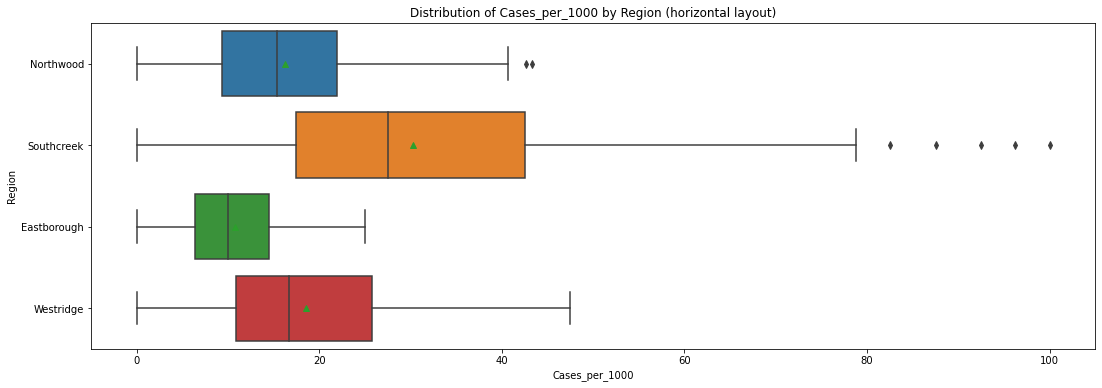

In [177]:
# import seaborn as sns
# import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
sns.boxplot(y="Region", x="Cases_per_1000", data=df, orient="h", showmeans=True)
#                                                    ^ Changes default 'vertical' orientation to horizontal
plt.title("Distribution of Cases_per_1000 by Region (horizontal layout)")
plt.xlabel("Cases_per_1000")     # need to overide deafult labelling as we are now 'horizontal'
plt.ylabel("Region")
plt.show()

## Visualisations show cross-region differences: But is this statistically so?

### Compute Confidence Intervals
This approach checks whether the case trends across regions overlap in their Confidence Intervals, which if Confidence Intervals overlap significantly, the variations may not be meaningful.

In [102]:
for region in df["Region"].unique():
    data = df[df["Region"] == region]["Cases_per_1000"].dropna()
    mean = data.mean()
    std = data.std()
    ci_low, ci_high = stats.norm.interval(0.95, loc=mean, scale=std / (len(data)**0.5))
    print(f"{region}: Mean={mean:.2f}, CI=[{ci_low:.2f}, {ci_high:.2f}]")

Northwood: Mean=16.30, CI=[15.56, 17.03]
Southcreek: Mean=30.29, CI=[28.90, 31.69]
Eastborough: Mean=10.77, CI=[10.31, 11.24]
Westridge: Mean=18.58, CI=[17.75, 19.41]


This result provides crucial insights into New Cases per 1000 Population across different regions and their respective confidence intervals (CIs). Let’s interpret it carefully:

Each region's mean represents its average infection rate, while the CI range indicates the interval within which we expect the true mean to lie with 95% confidence. Key Observations

**Southcreek** has the highest case rate 
- With a mean of 30.29, it has consistently higher infections compared to other regions.
- Its confidence interval [28.90, 31.69] does not overlap with other regions, reinforcing that Southcreek’s infection rate is significantly higher.

**Eastborough** has the lowest case rate
- Mean of 10.77, with CI [10.31, 11.24]—indicating that it is consistently lower than all other regions.
- There’s no overlap with Southcreek, confirming statistical significance.

**Northwood** & Westridge have overlapping CIs
- Northwood’s CI [15.56, 17.03] and Westridge’s CI [17.75, 19.41] slightly overlap.
- This suggests that while Westridge has a slightly higher mean, the difference might not be statistically significant.

Significance Confirmed
- Since confidence intervals don’t overlap between Southcreek and Eastborough, it confirms a real statistical difference in case rates.
- The lack of overlap between Southcreek vs. Northwood and Southcreek vs. Westridge also suggests significant differences.

***NOTA BENE***

    Using confidence intervals (CIs) to identify significant differences is more indicative rather than a fully rigorous statistical test. While non-overlapping confidence intervals suggest a potential statistical difference, this approach does not formally test hypotheses or account for sampling variability in the same way traditional statistical tests (e.g., ANOVA, Kruskal-Wallis, Tukey's HSD) do.

    Confidence Intervals Are Useful as
    -  Quick visual check—They provide a straightforward indication of variability and differences across groups. 
    -  Helps assess potential significance—If two groups have non-overlapping CIs, there is a strong likelihood that their   means are different.
    -  Good for exploratory analysis—Can help decide whether more rigorous testing is needed.

### ANOVA Test (Analysis of Variance)
Having multiple regions, an ANOVA test helps determine whether the mean case counts differ significantly across them. NB use of ANOVA presumes normally distributed means.

In [94]:
import scipy.stats as stats

# Extracting case counts grouped by region
groups = [df[df["Region"] == region]["Cases_per_1000"].dropna() for region in df["Region"].unique()]

# Applying ANOVA test
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("     Since P-value < 0.05, there is statistical difference across groups")
else:
    print("     Since P-value > 0.05, there is NO statistical difference across groups")

F-statistic: 305.8675682835838, P-value: 2.8331125592886187e-164
     Since P-value < 0.05, there is statistical difference across groups


### Using a Kruskal-Wallis Test for Non-Normal Data
The Kruskal-Wallis Test is a non-parametric method, and is useful when case distributions are not normally distributed or contain outliers - NB Useful for skewed or highly variable case counts.

In [96]:
h_stat, p_value = stats.kruskal(*groups)

print(f"H-statistic: {h_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("     Since P-value < 0.05, there is statistical difference across groups")
else:
    print("     Since P-value > 0.05, there is NO statistical difference across groups")

H-statistic: 579.3329917083073, P-value: 3.045027118555396e-125
     Since P-value < 0.05, there is statistical difference across groups


### ... ***since after having run both ANOVA and Kruskal-Wallis tests and found in both cases statistical signicance, i.e. p values < 0.05, the question remains as to where that significant difference is located?***

To pinpoint where the difference lies, you need to run post hoc pairwise comparisons.

### Tukey’s Honest Significant Difference (HSD) Test
A Tukey test helps identify which pairs of regions have significantly different case rates. Tukey’s Honest Significant Difference (HSD) test assumes normality of the data, but it is robust to moderate departures from normality.

Key Assumptions of Tukey’s HSD:
- Normality: Ideally, data should follow a normal distribution, but mild deviations are acceptable.
- Homogeneity of Variances (Homoscedasticity): The variance across groups should be approximately equal.

In [100]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# performing Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df["Cases_per_1000"], df["Region"])
print(tukey_results)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1     group2   meandiff p-adj   lower    upper   reject
---------------------------------------------------------------
Eastborough  Northwood   5.5231   -0.0   3.8139   7.2323   True
Eastborough Southcreek  19.5222   -0.0   17.813  21.2314   True
Eastborough  Westridge   7.8071   -0.0   6.0979   9.5163   True
  Northwood Southcreek   13.999   -0.0  12.2898  15.7082   True
  Northwood  Westridge    2.284 0.0034   0.5748   3.9932   True
 Southcreek  Westridge  -11.715   -0.0 -13.4242 -10.0058   True
---------------------------------------------------------------


Key Elements of the Output
- Group1 & Group2: The regions being compared.
- Mean Difference (meandiff): The difference in mean case rates between the two regions.
- Adjusted p-value (p-adj): The probability of observing this difference by chance.
- Confidence Interval (lower, upper): The range within which the true difference is expected to fall.
- Reject Column: If "True", the difference is statistically significant.

### Interpretation
1. Southcreek vs. Other Regions
    - Southcreek consistently shows significantly higher case rates compared to all others.
    - Largest mean difference is 19.52 vs. Eastborough and 13.99 vs. Northwood, confirming a higher infection burden.
    - Reject = True for all comparisons → These differences cannot be attributed to random chance.


2. Eastborough vs. Other Regions
    - Eastborough has the lowest case rates across all regions.
    - 5.52 difference vs. Northwood and 7.80 vs. Westridge → These gaps are statistically significant, confirming that Eastborough is consistently less affected.


3. Northwood vs. Westridge
    - Smallest difference (2.28), but still statistically significant (p = 0.0034).
    - Indicates a slightly lower case rate in Northwood compared to Westridge, though the variation is less dramatic than seen with Southcreek.


4. Negative Mean Difference in Southcreek vs. Westridge
    - Southcreek has significantly higher case rates than Westridge (difference of -11.71).
    - The negative sign simply reflects order of subtraction (Southcreek minus Westridge).


### Takeaways
- Southcreek is the most affected region 
- Eastborough has the lowest infection rate 
- Northwood and Westridge show modest but significant differences 
- All comparisons except those involving similar rate regions (like Northwood-Westridge) show strong statistical significance (p ≈ 0)

### Dunn’s Test (for Non-Parametric Data)
Since Kruskal-Wallis detected significance, Dunn’s test is an appropriate non-parametric post hoc test.

Dunn’s Test is a post hoc pairwise comparison method used after a Kruskal-Wallis test to determine which specific pairs of regions have statistically significant differences in New Cases per 1000 Population. The table outputted will show p-values for comparisons between each pair of regions. 

The ***lower the p-value***, the stronger the statistical evidence that there is a significant difference between the two regions.

In [107]:
!pip install scikit-posthocs
import scikit_posthocs as sp

dunn_results = sp.posthoc_dunn(df, val_col="Cases_per_1000", group_col="Region", p_adjust="bonferroni")

print(dunn_results)

Defaulting to user installation because normal site-packages is not writeable
               Eastborough     Northwood     Southcreek     Westridge
Eastborough   1.000000e+00  6.581922e-21  9.516703e-125  1.325852e-36
Northwood     6.581922e-21  1.000000e+00   2.204734e-45  7.978882e-03
Southcreek   9.516703e-125  2.204734e-45   1.000000e+00  1.252215e-27
Westridge     1.325852e-36  7.978882e-03   1.252215e-27  1.000000e+00


### INTERPRETATION

1. Southcreek vs. All Other Regions
    - Extremely small p-values (< 1e-45) confirm that Southcreek has significantly higher case rates than Northwood, Eastborough, and Westridge.
    - Strongest difference is against Eastborough (p = 9.516703e-125), confirming a clear disparity in case burden.


2. Eastborough vs. All Other Regions
    - Comparisons with Northwood (p = 6.58e-21), Southcreek (p = 9.52e-125), and Westridge (p = 1.32e-36) show statistically significant differences.
    - This confirms Eastborough consistently has lower case rates than all other regions.


3. Northwood vs. Westridge (p = 0.0079)
    - This is still significant (p < 0.05), but much weaker compared to other comparisons.
    - This suggests a modest difference in case trends between Northwood and Westridge.


4. Comparisons within Westridge
    - Westridge shows significant differences against all other regions (p-values < 0.01), though not as extreme as Southcreek vs. Eastborough.


### Takeaways
- Southcreek has the highest infection burden, significantly different from all other regions. 
- Eastborough has the lowest case rates, confirmed by statistically significant differences. 
- Northwood and Westridge exhibit more subtle variations but still show some statistical difference. 
- Since all p-values are far below 0.05, variations are unlikely due to random chance.

## Relationship with Environmental Factors

Scatterplot: New Cases vs. Temperature

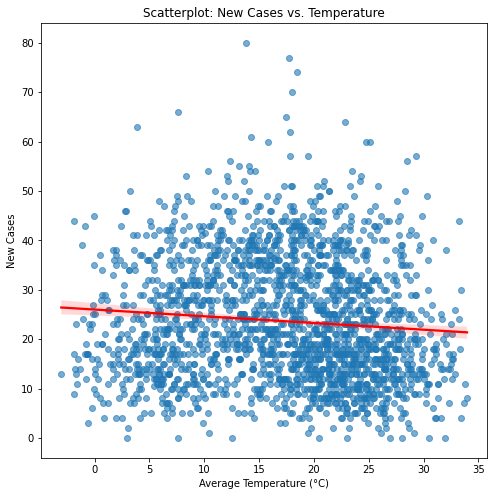

In [120]:
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(figsize=(8, 8))
# NB for regular scatter plot, ...
# sns.scatterplot(x=df["Temperature_Avg_C"], y=df["New_Cases"], alpha=0.6)

# NB for  scatter plot with regression line, ...
sns.regplot(x=df["Temperature_Avg_C"], y=df["New_Cases"], scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})

plt.xlabel("Average Temperature (°C)")
plt.ylabel("New Cases")
plt.title("Scatterplot: New Cases vs. Temperature")
plt.show()

To quantify the relationship between New Cases and Average Temperature, we'll calculate Pearson's correlation coefficient, which measures the strength and direction of a linear relationship between two variables. A value around ±0.3 to ±0.5 suggests moderate correlation, while above ±0.7 indicates a strong relationship. Also, If p < 0.05, the relationship is statistically significant, meaning it’s unlikely due to random chance.

In [140]:
#import scipy.stats as stats

# Computing Pearson correlation co-efficient and p-value
corr_coeff, p_value = stats.pearsonr(df["Temperature_Avg_C"], df["New_Cases"])

print(f"Pearson Correlation: {corr_coeff:.3f}")   # NB '.3' is for 3 decimal places
print(f"P-value: {p_value:.5f}")                 # NB 'f' is format as a floating-point number (rather than scientific notation or integers).

Pearson Correlation: -0.088
P-value: 0.00006


Let's assign a 'Weak/No', 'Moderate', or 'Strong' correlation remark based on the Pearson R value, and declare a statistical significance based on the p-value.

In [141]:
# Determine correlation strength
if abs(corr_coeff) >= 0.7:
    correlation_strength = "Strong correlation"
elif 0.3 <= abs(corr_coeff) < 0.7:
    correlation_strength = "Moderate correlation"
else:
    correlation_strength = "Weak or no significant correlation"

# Declare statistical significance
significance = "Statistically significant" if p_value < 0.05 else "Not statistically significant"

# Print results
print(f"Result: {correlation_strength}, {significance}")

Result: Weak or no significant correlation, Statistically significant


Scatterplot: New Cases vs. Humidity_Avg_Percent

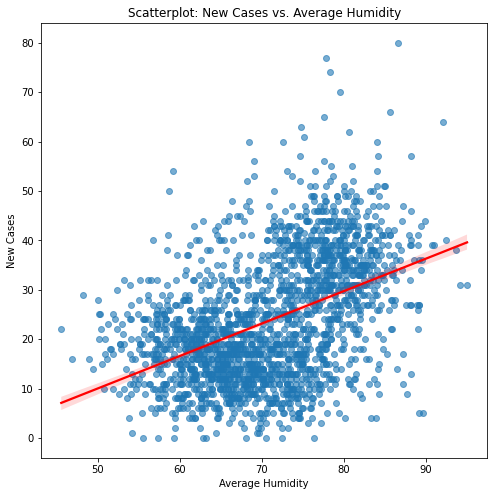

In [142]:
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.figure(figsize=(8, 8))
# NB for regular scatter plot, ...
# sns.scatterplot(x=df["Temperature_Avg_C"], y=df["New_Cases"], alpha=0.6)

# NB for  scatter plot with regression line, ...
sns.regplot(x=df["Humidity_Avg_Percent"], y=df["New_Cases"], scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})

plt.xlabel("Average Humidity")
plt.ylabel("New Cases")
plt.title("Scatterplot: New Cases vs. Average Humidity")
plt.show()

In [145]:
#import scipy.stats as stats

# Computing Pearson correlation co-efficient and p-value
corr_coeff, p_value = stats.pearsonr(df["Humidity_Avg_Percent"], df["New_Cases"])

print(f"Pearson Correlation: {corr_coeff:.3f}")   # NB '.3' is for 3 decimal places
print(f"P-value: {p_value:.5f}")                 # NB 'f' is format as a floating-point number (rather than scientific notation or integers).


# Determine correlation strength
if abs(corr_coeff) >= 0.7:
    correlation_strength = "Strong correlation"
elif 0.3 <= abs(corr_coeff) < 0.7:
    correlation_strength = "Moderate correlation"
else:
    correlation_strength = "Weak or no significant correlation"

# Determine statistical significance
significance = "Statistically significant" if p_value < 0.05 else "Not statistically significant"

# Print results
print(f"Result: {correlation_strength}, {significance}")

Pearson Correlation: 0.451
P-value: 0.00000
Result: Moderate correlation, Statistically significant


### KEY OBSERVATION
The scatterplot for New Cases and Average Temperature shows little discernible patterning or relationship between the two data sets. This is underscored by the regression line, which is almost horizontal; and furthermore by the precise value of the Pearson Correlation, being -0.088.

On the other hand, the scatterplot for New Cases and the Humidity levels demonstrate a discernible relationship between the two data sets. The greater the humidity the greater the number of new cases. The regression line clearly shows an upward incline, underscored by a Pearson Correlation value of +0.451 (statistically significant at p-value <0.05), which we designate as a moderate correlation.